## Analysis of an E-commerce Dataset Part 3 (s2 2023)


In this Portfolio task, you will continue working with the dataset you have used in portfolio 2. But the difference is that the ratings have been converted to like (with score 1) and dislike (with score 0). Your task is to train classification models such as KNN to predict whether a user like or dislike an item.  


The header of the csv file is shown below. 

| userId | timestamp | review | item | helpfulness | gender | category | item_id | item_price | user_city | rating |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
    
Your high level goal in this notebook is to try to build and evaluate predictive models for 'rating' from other available features - predict the value of the like (corresponding to rating 1) and dislike (corresponding to rating 0) in the data from some of the other fields. More specifically, you need to complete the following major steps: 
1) Explore the data. Clean the data if necessary. For example, remove abnormal instanaces and replace missing values.
2) Convert object features into digit features by using an encoder
3) Study the correlation between these features. 
4) Split the dataset and train a logistic regression model to predict 'rating' based on other features. Evaluate the accuracy of your model.
5) Split the dataset and train a KNN model to predict 'rating' based on other features. You can set K with an ad-hoc manner in this step. Evaluate the accuracy of your model.
6) Tune the hyper-parameter K in KNN to see how it influences the prediction performance

Note 1: We did not provide any description of each step in the notebook. You should learn how to properly comment your notebook by yourself to make your notebook file readable. 

Note 2: you are not being evaluated on the ___accuracy___ of the model but on the ___process___ that you use to generate it. Please use both ___Logistic Regression model___ and ___KNN model___ for solving this classification problem. Accordingly, discuss the performance of these two methods.
    

In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import pdist 
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [52]:
df = pd.read_csv('portfolio_3.csv')
df.head()

,userId,timestamp,review,item,helpfulness,gender,category,item_id,item_price,user_city,rating
0,4081,71900,Not always McCrap,McDonald's,3,M,Restaurants & Gourmet,41,30.74,4,1
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,4,M,Restaurants & Gourmet,74,108.30,4,0
2,4081,72000,The Wonderful World of Wendy,Wendy's,4,M,Restaurants & Gourmet,84,69.00,4,1
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",3,M,Movies,68,143.11,4,1
4,4081,100399,Hey! Gimme some pie!,American Pie,3,M,Movies,6,117.89,4,0


In [53]:
df.isnull().sum()

userId         0
timestamp      0
review         0
item           0
helpfulness    0
gender         0
category       0
item_id        0
item_price     0
user_city      0
rating         0
dtype: int64

In [54]:
df.dtypes

userId           int64
timestamp        int64
review          object
item            object
helpfulness      int64
gender          object
category        object
item_id          int64
item_price     float64
user_city        int64
rating           int64
dtype: object

# Part 1: Explore the data
- The dataset is free from 'NA' values and missing data, so there is no requirement for a data cleaning process.- 
Upon reviewing the datatypes, I observed a combination of integer, object, and float data. Consequently, I employed an ordinal encoder to transform all non-numeric data into a numeric format.

In [55]:
ord_enc = OrdinalEncoder()
df['gender_code'] = ord_enc.fit_transform(df[['gender']])
df['category_code'] = ord_enc.fit_transform(df[['category']])
df['review_code'] = ord_enc.fit_transform(df[['review']])

df['gender_code'] = df['gender_code'].astype(int)
df['category_code'] = df['category_code'].astype(int)
df['review_code'] = df['review_code'].astype(int)

drop = ['gender' , 'category', 'review', 'item']
df = df.drop(drop, axis = 1)
df.head()

,userId,timestamp,helpfulness,item_id,item_price,user_city,rating,gender_code,category_code,review_code
0,4081,71900,3,41,30.74,4,1,1,8,1618
1,4081,72000,4,74,108.30,4,0,1,8,1125
2,4081,72000,4,84,69.00,4,1,1,8,2185
3,4081,100399,3,68,143.11,4,1,1,5,2243
4,4081,100399,3,6,117.89,4,0,1,5,1033


# Part 2: Data Splitting 

To facilitate comparison with the 'rating' variable, I will divide this dataset into two scenarios:

1. The X dataset will encompass all features except 'rating,' while y will contain 'rating'.
2. The X dataset will include the top 3 highest correlation values (absolute value), and y contains 'rating'. 

In [57]:
X = df[['userId','timestamp', 'helpfulness','item_id','item_price','user_city', 'gender_code', 'category_code', 'review_code']]
y = df['rating']

# Logistics Regression Model
## Case 1: 
I split the data with the train size of 80%. 

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=142)
print(X_train.shape, X_test.shape)

(2148, 9) (537, 9)


In [59]:
model_log = LogisticRegression()

In [60]:
model_log.fit(X_train, y_train)

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
y_predicted = model_log.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_predicted) 
print("Accuracy: ", accuracy)

Accuracy:  0.6685288640595903


The accuracy for case 1 is 0.668 

## Correlation:
For case 2, first, I established a correlation table for the dataframe, then I choose 3 highest absolute values compared with 'rating' features. 

In [81]:
df.corr()

,userId,timestamp,helpfulness,item_id,item_price,user_city,rating,gender_code,category_code,review_code
userId,1.000000,-0.069176,-0.166136,-0.005549,0.024576,-0.030031,0.066444,-0.058324,-0.041362,0.007139
timestamp,-0.069176,1.000000,0.014179,-0.004452,0.010979,-0.014934,-0.009739,-0.003367,0.015009,0.007029
helpfulness,-0.166136,0.014179,1.000000,-0.019882,0.004112,0.012086,-0.010622,0.075947,-0.013408,-0.028259
item_id,-0.005549,-0.004452,-0.019882,1.000000,-0.054450,-0.005576,0.057107,0.002370,-0.045268,0.163544
item_price,0.024576,0.010979,0.004112,-0.054450,1.000000,-0.023427,0.026062,-0.040596,-0.115571,-0.041421
user_city,-0.030031,-0.014934,0.012086,-0.005576,-0.023427,1.000000,-0.034866,-0.065638,0.008017,0.045626
rating,0.066444,-0.009739,-0.010622,0.057107,0.026062,-0.034866,1.000000,-0.022169,-0.142479,-0.041756
gender_code,-0.058324,-0.003367,0.075947,0.002370,-0.040596,-0.065638,-0.022169,1.000000,0.022549,-0.037884
category_code,-0.041362,0.015009,-0.013408,-0.045268,-0.115571,0.008017,-0.142479,0.022549,1.000000,0.001970
review_code,0.007139,0.007029,-0.028259,0.163544,-0.041421,0.045626,-0.041756,-0.037884,0.001970,1.000000


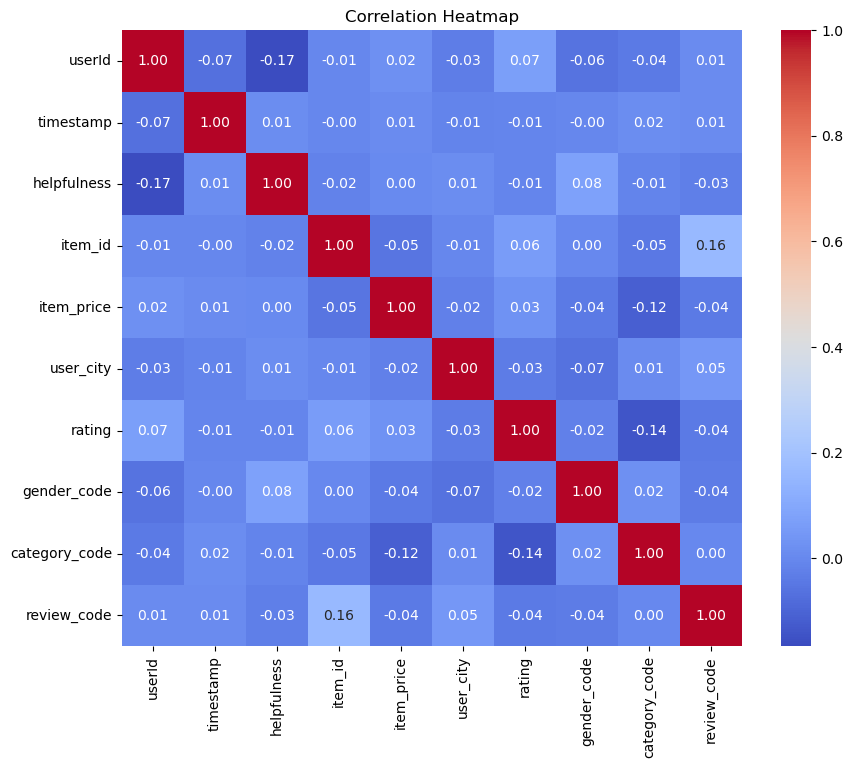

In [82]:
cor_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Case 2:
Based on the correlation with rating, I choose the top 3 highest absolute correlation value, which are: category_code, userId, and item_id.

In [83]:
X_2 = df[['userId','item_id','category_code']]
y_2 = df['rating']

In [84]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, train_size = 0.8, random_state=142)
print(X_train_2.shape, X_test_2.shape)

(2148, 3) (537, 3)


In [85]:
model_log2 = LogisticRegression()

In [86]:
model_log2.fit(X_train_2, y_train_2)

LogisticRegression()

In [87]:
y_predicted2 = model_log2.predict(X_test_2)

In [88]:
accuracy1 = accuracy_score(y_test_2, y_predicted2) 
print("Accuracy: ", accuracy1)

Accuracy:  0.6685288640595903


# Analysis: 
Both Case 1 and Case 2 achieved the same accuracy, implying that the logistic regression model's performance is consistent across the two scenarios.

Case 1 includes a broader set of features, which may provide more context and potentially improve the model's generalizability if there is sufficient data to support these features.

Case 2, on the other hand, simplifies the model by focusing on the most highly correlated features, potentially making it more interpretable and computationally efficient.

The accuracy of 0.668 indicates that the model is better than random guessing. In binary classification, random guessing would typically result in an accuracy close to 50% for a balanced dataset. Since 0.668 is higher than 50%, the model is capable of discriminating between the classes to some extent.

In conclusion, while feature correlation is an important consideration in feature selection and model building, the fact that both cases achieve the same accuracy suggests that, in this particular case, the choice of correlated features may not have a substantial impact on the model's predictive performance. 


# KNN Model
## Step 1: ad-hoc K = 5 

For this model, I use the splitted dataset from case 2, which only contain top 3 highest correlation values. 

In [119]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_2, y_train_2)

#Predict data
y_pred_knn = knn.predict(X_test_2)
accuracy_knn = accuracy_score (y_test_2, y_pred_knn)
print("Testing Accuracy: ", accuracy_knn)

Testing Accuracy:  0.6424581005586593


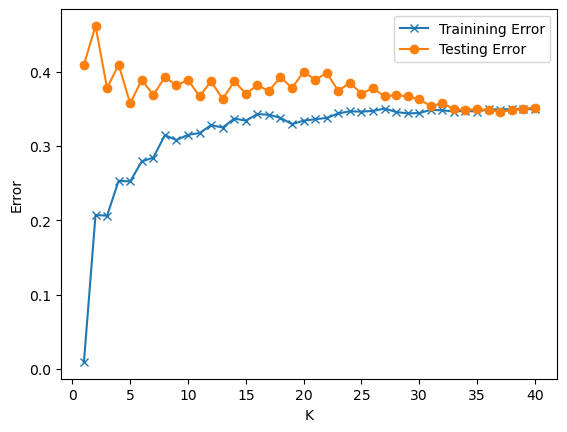

In [108]:
training_error=list()
testing_error=list()

for i in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_2, y_train_2)
    training_error.append(1.0-accuracy_score(knn.predict(X_train_2), y_train_2))
    testing_error.append(1.0-accuracy_score(knn.predict(X_test_2), y_test_2))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

## Analysis: 

An accuracy of 0.64 means that the KNN model with k = 5 is correct about 64% of the time when making predictions on the test data, which implies a moderate performance when making predictions on the test data. 

After implementing the model with k = 5, I visualized the relationship between the K-value and error, and there is a trend that the higher k value, the closer the relationship between training error and testing error. In general, the larger K will increase bias, smoother decision boundary since the prediction is based on the majority vote from a larger number of neighbors, and reduces variance, which narrows the gap between training error and testing error. 

# Step 2: K-Fold cross validation

First, I apply K-fold cross-validation to the initial data (not the split data - as the cross-validation procedure will handle the data splitting internally) to evaluate the performance of the KNN classifier on the dataset. I set cv = 10, which implies that the dataset will be divided into 10 equal parts. After performing this process, it provides the accuracy of the model on each fold and an average accuracy of 0.53, along with its variability range. 

In [125]:
knn = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(knn, X_2, y_2, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.41263941 0.58364312 0.59479554 0.44609665 0.60594796 0.55223881
 0.57835821 0.55970149 0.56343284 0.40298507]
Average accuracy: 0.5300 +- 0.0739


# Step 3: Hyperparameter Tuning Process

I specify a range of values for the hyperparameter k from 1 to 40. 

In [126]:
parameter_grid = {'n_neighbors': range(1, 41)}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
grid_search.fit(X_2, y_2)

print('Best K value: ', grid_search.best_params_['n_neighbors'])
print('The accuracy: ', grid_search.best_score_)

Best K value:  37
The accuracy:  0.6246032846917827


# Analysis: 

although K = 5 might have produced a higher accuracy (0.642) on the train-test split, the hyperparameter tuning process results the best K value is 37, with an accuracy of 0.624. This might implies that when K is low, the model has lower bias and higher variance, which leads to overfitting and may hinder some unseen data. The hyperparameter tuning process suggests that K value = 37 is expected to generalize better to new, unseen data.